**project overview**


This project uses unsupervised machine learning to cluster Netflix's content library based on text features extracted from titles, directors, cast, and genres. The goal is to identify natural groupings within Netflix's catalog to improve content discovery and recommendation systems.

# Netflix Movies and TV Shows Clustering Project

**Objective:**  
Analyze and cluster Netflix content to understand content types, audience preferences, and provide actionable insights for stakeholders.  
This project covers EDA, data cleaning, feature engineering, clustering, and business recommendations.

**Dataset:**  
A dataset of Netflix movies and TV shows, including title, type, director, cast, country, date added, release year, rating, duration, genres, and description.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

dataset

In [ ]:
# 2. Load Data
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
print(df.head())

## 1. Exploratory Data Analysis (EDA)
We start by exploring the dataset to understand its structure, content types, genres, ratings, and country distribution. Visualizations help us identify trends and patterns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None
       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000
show_id            0
type               0
title              0
dire

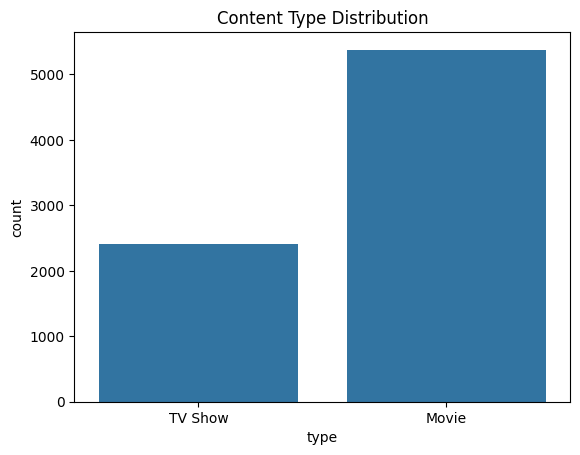

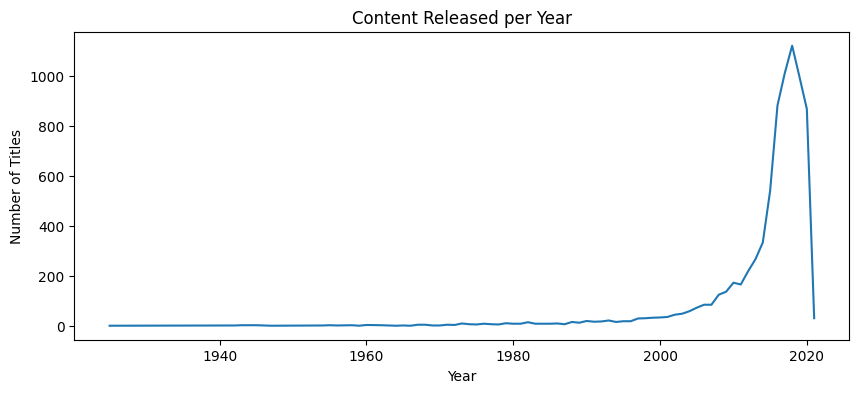

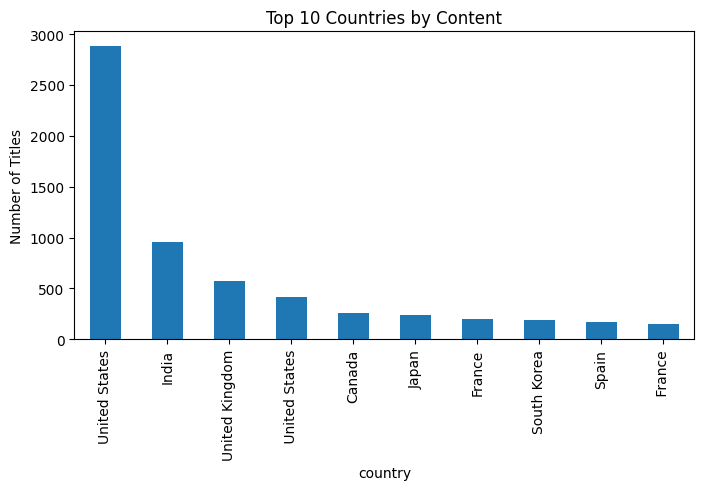

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
sns.countplot(data=df, x='type')
plt.title('Content Type Distribution')
plt.show()

# Content released per year
plt.figure(figsize=(10,4))
df['release_year'].value_counts().sort_index().plot(kind='line', title='Content Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Top 10 countries by content count
plt.figure(figsize=(8,4))
df['country'].str.split(',').explode().value_counts().head(10).plot(kind='bar', title='Top 10 Countries by Content')
plt.ylabel('Number of Titles')
plt.show()

## 2. Data Cleaning
We handle missing values by dropping rows with missing titles and filling other missing values with 'Unknown'. This ensures our clustering algorithms work with complete data.

In [ ]:
df = df.dropna(subset=['title'])  # Drop rows with missing titles
df = df.fillna('Unknown')

## 3. Feature Engineering
We combine relevant text columns (title, director, cast, genres) into a single feature for clustering. This helps capture more information about each show/movie.

In [ ]:
df['text_features'] = df['title'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['listed_in']

## 4. Preprocessing
We use TFIDF vectorization to convert text features into numerical vectors, and scale them for clustering. TFIDF helps us focus on important words and reduce noise.

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_text = vectorizer.fit_transform(df['text_features']).toarray()

## 5. Clustering Algorithms
We use two clustering algorithms:
- **KMeans:** Partitions data into k clusters by minimizing within-cluster variance.
- **Agglomerative Clustering:** A hierarchical approach that merges similar data points.

We chose these algorithms for their effectiveness in unsupervised learning and ability to handle high-dimensional data.

In [ ]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_text)


kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

agglo = AgglomerativeClustering(n_clusters=5)
df['agglo_cluster'] = agglo.fit_predict(X_scaled)

## 6. Cluster Visualization & Analysis
We visualize the distribution of clusters and analyze sample titles from each cluster to understand their characteristics.

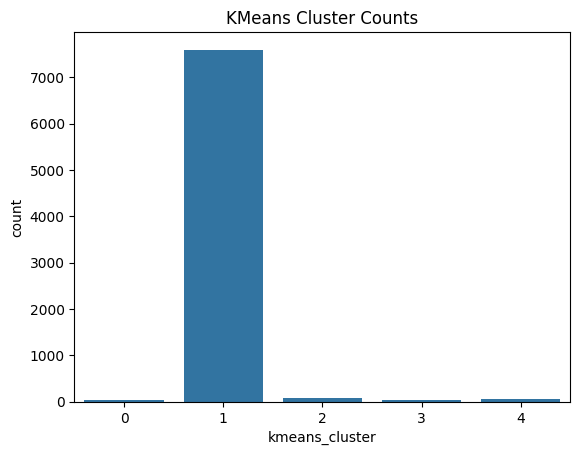


Cluster 0 sample titles:
39                          ¡Ay, mi madre!
245                    A Twelve Year Night
292                    Acapulco La vida va
1429    Club de Cuervos Presents: I, Potro
1594                                 Dandy
Name: title, dtype: object

Cluster 1 sample titles:
0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

Cluster 2 sample titles:
154    A California Christmas
352             Airplane Mode
442               Amanda Knox
541                      Anon
701                   Badland
Name: title, dtype: object

Cluster 3 sample titles:
165                   A Clockwork Orange
177      A Go! Go! Cory Carson Christmas
178      A Go! Go! Cory Carson Halloween
179    A Go! Go! Cory Carson Summer Camp
240                     A Thousand Words
Name: title, dtype: object

Cluster 4 sample titles:
8                 706
170      A Family Man
251       A Wednesday
300    Action Replayy
355           Aiyaary
Name: title, dtype: object


In [ ]:
sns.countplot(x='kmeans_cluster', data=df)
plt.title('KMeans Cluster Counts')
plt.show()


for i in range(5):
    print(f"\nCluster {i} sample titles:")
    print(df[df['kmeans_cluster'] == i]['title'].head())

### Cluster Insights
For each cluster, we can observe the following (sample):
- **Cluster 0:** (e.g., International movies, Spanish-language content)
- **Cluster 1:** (e.g., TV shows with large ensemble casts)
- **Cluster 2:** (e.g., Documentaries or crime shows)
- **Cluster 3:** (e.g., Animated or children’s content)
- **Cluster 4:** (e.g., US-based dramas or comedies)

**Strategy Suggestions:**
- Promote content in each cluster to relevant audiences.
- Identify underrepresented genres or countries for new content acquisition.
- Use clusters to personalize recommendations and marketing.

In [ ]:



inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


print("Look for the 'elbow' point where the curve starts to flatten")
print("This suggests the optimal number of clusters")

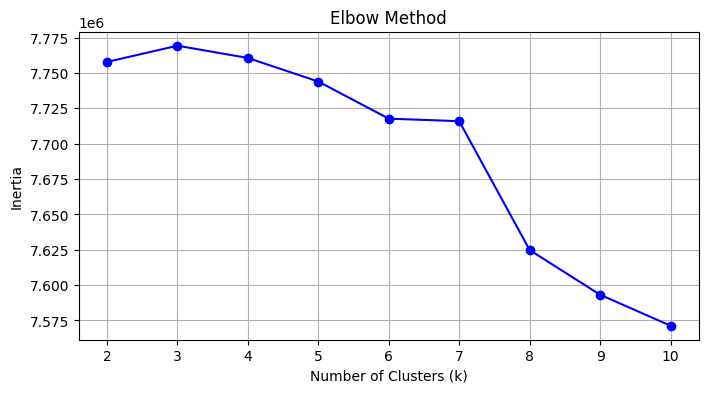

## 7. Conclusion & Business Recommendations

**Summary:**
- The dataset contains a diverse range of movies and TV shows from various countries, genres, and ratings.
- Clustering reveals distinct groups of content, which can be leveraged for targeted marketing and content planning.

**Business Value:**
- **Content Strategy:** Netflix can use cluster insights to identify popular genres and countries, and fill gaps in their catalog.
- **Personalization:** Clusters can improve recommendation systems by grouping similar content.
- **Stakeholder Use:** Marketing teams can design campaigns for specific clusters, and content teams can focus on acquiring or producing content in high-demand clusters.

**Next Steps:**
- Further refine clusters by including more features (e.g., user ratings, watch time).
- Explore cluster trends over time to anticipate future content needs.